In [93]:
import numpy as np
import matplotlib.pyplot as plt

**SIR mudeli diferentsiaalvõrrandi süsteem (DVS)**
$$
\begin{cases}
S'(t) = -\beta \cdot S(t) \cdot I(t), \\
I'(t) = \beta \cdot S(t) \cdot I(t) - r \cdot I(t),\\
R'(t) = r\cdot I(t),\\
S(0) = S_0, I(0) = I_0, R(0) = R_0.
\end{cases}
$$

S(t) - tervete/haigestumisvõimeliste inimeste arv.
I(t) - nakatunud inimeste arv.
R(t) - haigusest tervenenud inimeste arv.

**(1) DVS parameetrite väärtused.**

$ \beta = 2.18\cdot 10^{-3}, r = 0.441 $. Edaspidistel algväärtuse defineerimistel arvestan, et $S(0) + I(0) + R(0) = 763$.

In [97]:
beta = 2.18e-3
r = 0.441

**(2) Lahendisammude formuleerimine ja rakendamine koodis.**

 Olgu $h = t_{n+1} - t_{n} = \frac{t_{lõpp} - t_{algus}}{N}$ minimaalse ajalise vahemiku pikkus ja $N$ ajaliste osalõikude arv.

DVS $\mathbf{Y'}(t) = \mathbf{F}(t, \mathbf{Y}(t))$ (kus antud ülesande kontekstis $\mathbf{Y}, \mathbf{Y'} \in \mathbb{R}^{3}$ ) korral avaldub trapetsmeetodi lahendussamm $\mathbf{Y}_{n+1} = \mathbf{Y}(t + h)$ kujul

$$\mathbf{Y}(t + h) = \mathbf{Y}(t) + \frac{h}{2} (\mathbf{F}(t, \mathbf{Y}(t)) + \mathbf{F}(t + h, \mathbf{Y}(t + h))),$$

milles $\mathbf{Y}(t + h)$ avaldub Euleri meetodi järgi kui

$\mathbf{Y}(t + h) = \mathbf{Y}(t) + \mathbf{F}(t, \mathbf{Y}(t)).$


Selle DVS Runge-Kutta 4. järku lahendisamm avaldub kujul

$$\mathbf{Y}'(t + h) = \mathbf{Y}(t) + \frac{h}{6} (\mathbf{K_1} + 2\mathbf{K_2} + 2\mathbf{K_3} + \mathbf{K_4}),$$
milles vahearvutuste vektorid $\mathbf{K_1}, ..., \mathbf{K_4}$ avalduvad Runge-Kutta meetodi eeskirja järgi kui
$$
\begin{aligned}
&\mathbf{K_1} = \mathbf{F}(t, \mathbf{Y}(t)),\\
&\mathbf{K_2} = \mathbf{F}\left(t + \frac{h}{2}, \mathbf{Y}(t) + \frac{h}{2} \mathbf{K_1}\right),\\
&\mathbf{K_3} = \mathbf{F}\left(t + \frac{h}{2}, \mathbf{Y}(t) + \frac{h}{2} \mathbf{K_2}\right),\\ 
&\mathbf{K_4} = \mathbf{F}\left(t + h, \mathbf{Y}(t) + h \mathbf{K_3}\right).
\end{aligned}
$$

Kuna antud DVS-is on tuletised sõltuvad ainult muutujatest endist ning mitte sõltumatust muutujast ehk $\mathbf{Y'} = \mathbf{F}(\mathbf{Y})$, siis ei pea antud ülesande koodis sõltumatu muutujaga (t - aeg) tuletise funktsiooni defineerides ja rakendades arvestama.

In [ ]:
# F(t, Y) = F(Y) = (SIR)' funktsioon
#vastavalt ülesande DVS eeskirjale defineerin funktsiooni,
#mis võtab parameetriks (S, I, R) andmevektori ja annab
#väljundiks andmevektori (S', I', R')
def dSIRdt(SIR):
    S, I, R = SIR
    dSdt = -beta * S * I
    dIdt = beta*S*I - r * I
    dRdt = r*I
    return np.array([dSdt, dIdt, dRdt])

#trapetsmeetodi lahendifunktsioon
#sisendiks on oodatavad funktsioonide väärtuste andmevektor (S, I, R) ajahetkel t ja sammupikkus h
#väljundiks on trapetsmeetodiga arvutatud funktsioonide väärtus (S, I, R) vektori kujul ajahetkel t+h
def TrapetsSamm(Y, h):
    #trapetsmeetodi iteratsioonisamm vastavalt eeskirjale
    F = dSIRdt
    Y_Euler = Y + F(Y)*h
    return Y + 0.5*h*(F(Y) + F(Y_Euler))

#RK4 lahendifunktsioon
#sisendiks on oodatavad funktsioonide väärtuste andmevektor (S, I, R) ajahetkel t ja sammupikkus h
#väljundiks on RK4-ga arvutatud funktsioonide väärtus (S, I, R) vektori kujul ajahetkel t+h
def RK4Samm(Y, h):
    #Runge-Kutta 4 iteratsioonisamm vastavalt eeskirjale
    F = dSIRdt
    K1 = F(Y)
    K2 = F(Y + 0.5*h*K1)
    K3 = F(Y + 0.5*h*K2)
    K4 = F(Y + h*K3)
    return Y + (1/6)*h*(K1 + 2*K2 + 2*K3 + K4)

#defineerin eraldi lahenditsükli, mis võtab sisendiks algväärtuse vektori Y0, ajalise lõigu [a,b] otspunktide väärtused, lõigu
#vahemike arvu N ja rakendab RK4 või trapetsmeetodit lahendimaatriksi välja arvutamiseks
def LahendiTsükkel(Y0, ab, N, meetod):
    #N vahemikku tähendab sõlmpunktide arvu jaoks linspace parameetris N + 1 punkti
    t = np.linspace(*ab, N + 1) #*(a, b) --> a, b
    dt = t[1] - t[0]
    #kogu lahendimaatriks antud ülesandes kujuga (N+1) x 3 (S, I, R on vastavalt veeruvektorid lahendimaatriksis)
    Y_kogu_lahend = np.zeros((N + 1, Y0.size))
    #algtingimuse kinnitamine
    Y_kogu_lahend[0] = Y0
    #lahendamistsükkel: N-kordne meetodi rakendamine Y(1h), Y(2h),..., Y((N+1)h) arvutamiseks --- Y(1h) = meetod(Y(0h)), Y(2h) = meetod(Y(1h)) jne
    for i in range(N):
        Y_kogu_lahend[i+1] = meetod(Y_kogu_lahend[i], h = dt)
    #väljastab lisaks lahendimaatriksile ka sõlmpunktide sõltumatu muutuja väärtuse vektori
    return Y_kogu_lahend, t

**(3) Ülesande lahendamine lõigul [0,25] (päevade arv) trapetsmeetodi ja Runge-Kutta 4. järku meetodiga.**

Algtingimused:

$S(0) = 763 − 1 = 762, I(0) = 1, R(0) = 0.$

In [ ]:
I0 = 1
S0 = 763 - I0
R0 = 0

#algtingimuste andmevektor
SIR0 = np.array([S0, I0, R0])

#kuna ajavahemik on kõigil lahendustel ühine, võtan lahenditsüklist erinevate N puhul ajavahemiku vaid ühel korral
SIR_lahend_N50_T, ajavahemik50 = LahendiTsükkel(SIR0, (0, 25), N = 50, meetod=TrapetsSamm)
SIR_lahend_N50_RK4 = LahendiTsükkel(SIR0, (0,25), N = 50, meetod=RK4Samm)[0]

SIR_lahend_N100_T, ajavahemik100 = LahendiTsükkel(SIR0, (0, 25), N = 100, meetod=TrapetsSamm)
SIR_lahend_N100_RK4 = LahendiTsükkel(SIR0, (0,25), N = 100, meetod=RK4Samm)[0]

SIR_lahend_N200_T, ajavahemik200 = LahendiTsükkel(SIR0, (0, 25), N = 200, meetod=TrapetsSamm)
SIR_lahend_N200_RK4 = LahendiTsükkel(SIR0, (0,25), N = 200, meetod=RK4Samm)[0]

**(4) Graafikud RK4 ja trapetsmeetodi võrdlemiseks.**

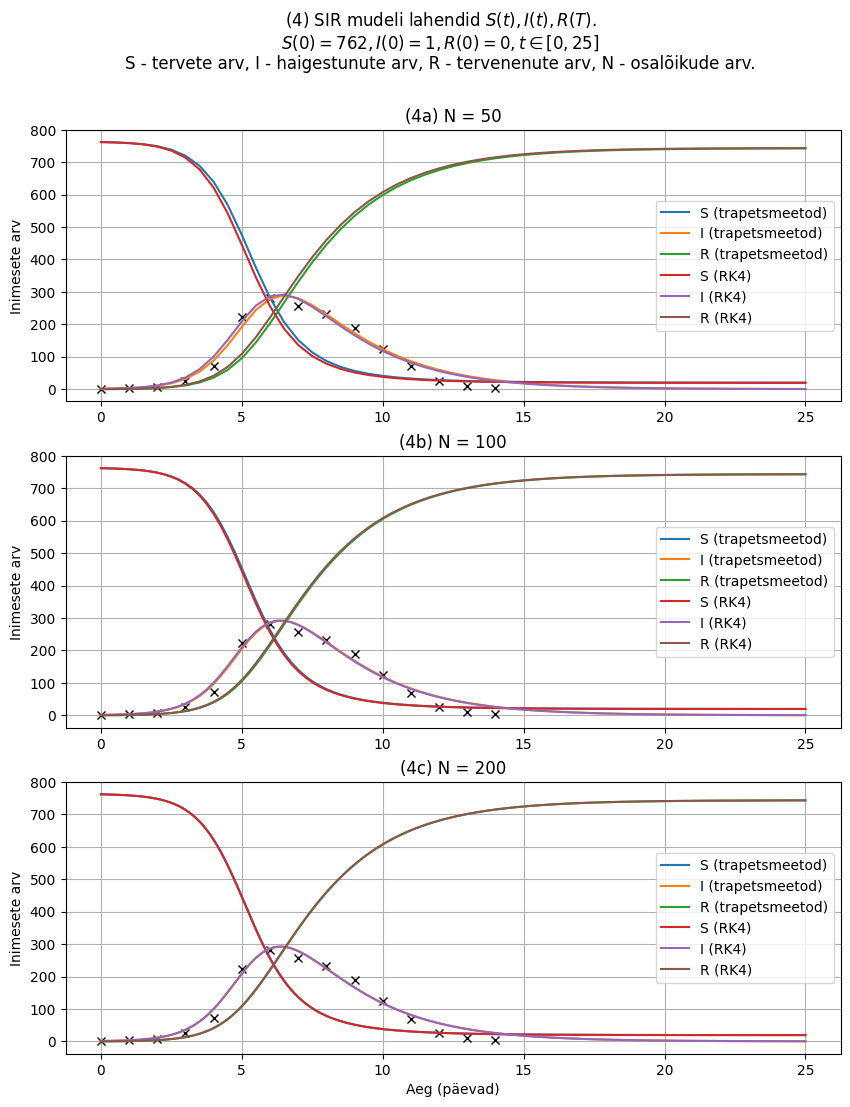

In [ ]:
#reaalse süsteemi andmed (ainult S(t), I(t), R(t) vs. t)
päevad = np.arange(start=0, stop=15)
andmed = np.array([1, 3, 7, 25, 72, 222, 282, 256, 233, 189, 123, 70, 25, 11, 4])

#graafikute joonistamine matplotlib.pyplot.subplots abiga
fig, axes = plt.subplots(3, 1, figsize = (10, 12))
fig.suptitle(r"(4) SIR mudeli lahendid $S(t), I(t), R(T)$."+"\n"+ r"$S(0) = 762, I(0) = 1, R(0) = 0, t \in [0, 25]$" + 
             "\nS - tervete arv, I - haigestunute arv, R - tervenenute arv, N - osalõikude arv.")

for ax in axes:
    ax.plot(päevad, andmed, "x", color = "black")
    ax.grid()

axes[0].plot(ajavahemik50, SIR_lahend_N50_T, label = ["S (trapetsmeetod)", "I (trapetsmeetod)", "R (trapetsmeetod)"])
axes[0].plot(ajavahemik50, SIR_lahend_N50_RK4, label = ["S (RK4)", "I (RK4)", "R (RK4)"])
axes[0].set_title("(4a) N = 50")
axes[0].legend()
axes[0].set_ylabel("Inimesete arv")
axes[2].set_xlabel("Aeg (päevad)")

axes[1].plot(ajavahemik100, SIR_lahend_N100_T, label = ["S (trapetsmeetod)", "I (trapetsmeetod)", "R (trapetsmeetod)"])
axes[1].plot(ajavahemik100, SIR_lahend_N100_RK4, label = ["S (RK4)", "I (RK4)", "R (RK4)"])
axes[1].set_title("(4b) N = 100")
axes[1].legend()
axes[1].set_ylabel("Inimesete arv")

axes[2].plot(ajavahemik200, SIR_lahend_N200_T, label = ["S (trapetsmeetod)", "I (trapetsmeetod)", "R (trapetsmeetod)"])
axes[2].plot(ajavahemik200, SIR_lahend_N200_RK4, label = ["S (RK4)", "I (RK4)", "R (RK4)"])
axes[2].set_title("(4c) N = 200")
axes[2].legend()
axes[2].set_ylabel("Inimesete arv")

plt.show()

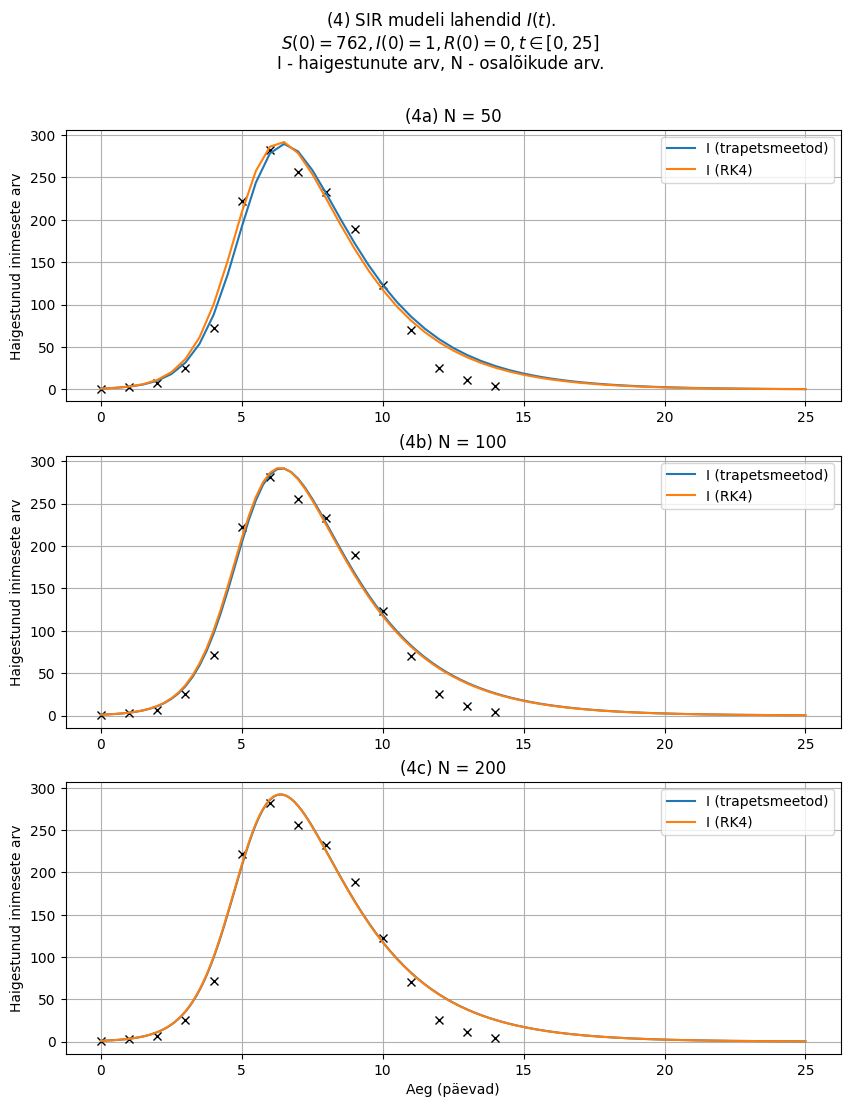

In [ ]:
#graafikute joonistamine (ainult I(t) vs. t)
fig, axes = plt.subplots(3, 1, figsize = (10, 12))
fig.suptitle(r"(4) SIR mudeli lahendid $I(t)$."+"\n"+ r"$S(0) = 762, I(0) = 1, R(0) = 0, t \in [0, 25]$" + 
             "\nI - haigestunute arv, N - osalõikude arv.")

for ax in axes:
    ax.plot(päevad, andmed, "x", color = "black")
    ax.grid()

axes[0].plot(ajavahemik50, SIR_lahend_N50_T.T[1], label = "I (trapetsmeetod)")
axes[0].plot(ajavahemik50, SIR_lahend_N50_RK4.T[1], label = "I (RK4)")
axes[0].set_title("(4a) N = 50")
axes[0].legend()
axes[0].set_ylabel("Haigestunud inimesete arv")
axes[2].set_xlabel("Aeg (päevad)")

axes[1].plot(ajavahemik100, SIR_lahend_N100_T.T[1], label = "I (trapetsmeetod)")
axes[1].plot(ajavahemik100, SIR_lahend_N100_RK4.T[1], label = "I (RK4)")
axes[1].set_title("(4b) N = 100")
axes[1].legend()
axes[1].set_ylabel("Haigestunud inimesete arv")

axes[2].plot(ajavahemik200, SIR_lahend_N200_T.T[1], label = "I (trapetsmeetod)")
axes[2].plot(ajavahemik200, SIR_lahend_N200_RK4.T[1], label = "I (RK4)")
axes[2].set_title("(4c) N = 200")
axes[2].legend()
axes[2].set_ylabel("Haigestunud inimesete arv")

plt.show()

**(5) Mis juhtub, kui $I(0)$ on ühe asemel mingi väike arv $(10^{−5})$ ja mida see reaalelus võiks
tähendada?**

In [99]:
#vastava algväärtuse vektor
SIR0_5_pisike = np.array([763 - 10e-5, 10e-5, 0])

SIR_lahend_5_RK4, t_5 = LahendiTsükkel(SIR0_5_pisike, (0, 25), 200, RK4Samm)

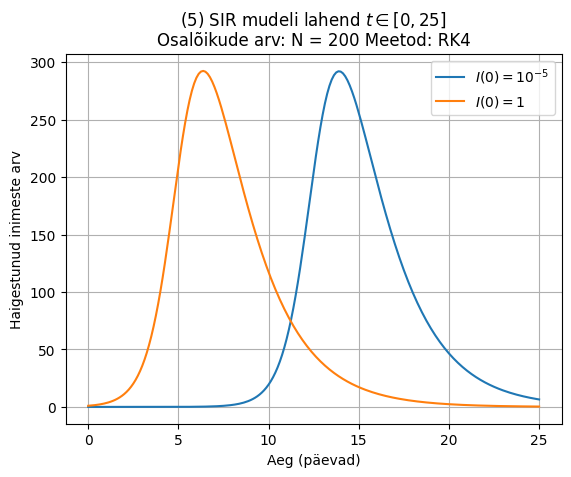

In [8]:
plt.plot(t_5, SIR_lahend_5_RK4[:,1], label = r"$I(0) = 10^{-5}$")
plt.plot(t_5, SIR_lahend_N200_RK4[:,1], label = r"$I(0) = 1$")
plt.legend()
plt.title(r"(5) SIR mudeli lahend $t \in [0, 25]$" +
             "\n"+"Osalõikude arv: N = 200 Meetod: RK4")
plt.ylabel("Haigestunud inimeste arv")
plt.xlabel("Aeg (päevad)")
plt.grid()
plt.show()

Väga väikese $I(0) < 1$ puhul tekib identne lahendikõver, mis on ajas edasi nihkunud (haripunkt ca 8 päeva hiljem). Esmapilgul tundus, et päriselus võiks selline mudel tähendada ehk teatavat peiteaega esimese haigestunu puhul, kus ta ei ole veel täielikult saavutanud nakatunu.

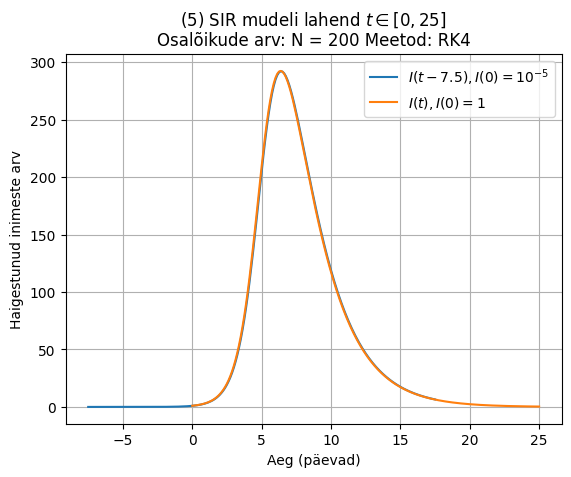

In [9]:
#Proovisin erinevaid nihkeid, 7.5 päevase nihke puhul need kõverad kattuvad praktiliselt perfektselt.
plt.plot(t_5-7.5, SIR_lahend_5_RK4[:,1], label = r"$I(t-7.5),I(0) = 10^{-5}$")
plt.plot(t_5, SIR_lahend_N200_RK4[:,1], label = r"$I(t),I(0) = 1$")
plt.legend()
plt.title(r"(5) SIR mudeli lahend $t \in [0, 25]$" +
             "\n"+"Osalõikude arv: N = 200 Meetod: RK4")
plt.ylabel("Haigestunud inimeste arv")
plt.xlabel("Aeg (päevad)")
plt.grid()
plt.show()

Kõige paremini aga tähistab algtingimusega $I(0) = 10^{-5}$ mudel olukorda, kus esimene tegelik nakatunu ilmub alles 7.5 päeva hiljem.

**(6) Mis juhtub, kui sammupikkus on liiga suur (näiteks N = 10)? Umbes millise osalõikude arvu juures võib oma tulemust pidada kindlaks, s.t. et lahend N suurenedes enam palju ei muutu (eraldi trapetsmeetodi ja Runge-Kutta 4. järgu jaoks). N = 25, 50, 100, 200 või rohkem?**

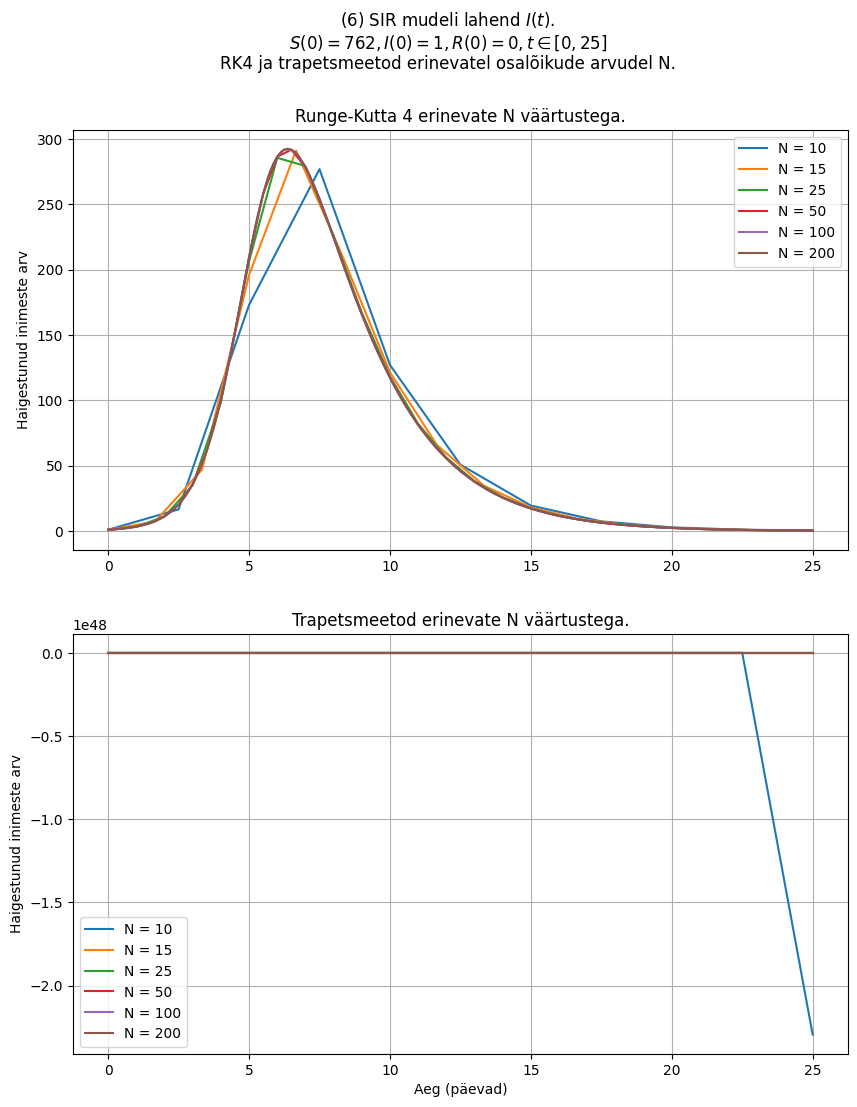

In [101]:
uuritavadN = [10, 15, 25, 50, 100, 200]
l = len(uuritavadN)
uuritavadLahendiMaatriksidT = []
uuritavadLahendiMaatriksidRK4 = []
ajavahemikud = []

#varem defineeritud algtingimus: 
#SIR0 = np.array([S0=762, I0=1, R0=0])

for i in range(l):
    n = uuritavadN[i]
    lahendRK4, ajavahemik = LahendiTsükkel(SIR0, (0, 25), n, RK4Samm)
    lahendTrapets = LahendiTsükkel(SIR0, (0, 25), n, TrapetsSamm)[0]

    ajavahemikud.append(ajavahemik)
    #võtan vaatluse alla ainult lahendimaatriksi kujuga ((N+1)x3).T 1. veeruindeksil olevad I(t) vektorid. 
    uuritavadLahendiMaatriksidT.append(lahendTrapets.T[1])
    uuritavadLahendiMaatriksidRK4.append(lahendRK4.T[1])


fig, axes = plt.subplots(2, 1, figsize = (10, 12))

fig.suptitle(r"(6) SIR mudeli lahend $I(t)$."+"\n"+ r"$S(0) = 762, I(0) = 1, R(0) = 0, t \in [0, 25]$" + 
             "\nRK4 ja trapetsmeetod erinevatel osalõikude arvudel N.")


axes[1].set_title("Trapetsmeetod erinevate N väärtustega.")
axes[0].set_title("Runge-Kutta 4 erinevate N väärtustega.")

for i in range(l):
    axes[1].plot(ajavahemikud[i], uuritavadLahendiMaatriksidT[i], label = f"N = {uuritavadN[i]}")
    axes[0].plot(ajavahemikud[i], uuritavadLahendiMaatriksidRK4[i], label = f"N = {uuritavadN[i]}")


for ax in axes:
    ax.legend()
    ax.grid()
    ax.set_ylabel("Haigestunud inimeste arv")

axes[1].set_xlabel("Aeg (päevad)")
plt.show()

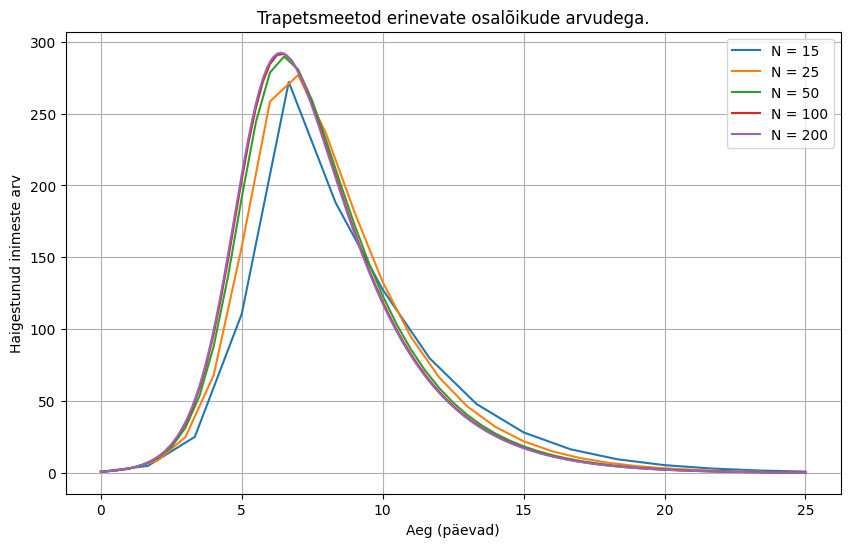

In [89]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.set_title("Trapetsmeetod erinevate osalõikude arvudega.")
ax.set_ylabel("Haigestunud inimeste arv")
ax.set_xlabel("Aeg (päevad)")

for i in range(1,l):
    ax.plot(ajavahemikud[i], uuritavadLahendiMaatriksidT[i], label = f"N = {uuritavadN[i]}")

plt.grid()
plt.legend()
plt.show()

$N = 10$ osalõigu puhul läheb trapetsmeetod väga ebastabiilseks mitmekümne suurusjärgu kordselt. RK4 puhul seda muret ei teki $N = 10$ juures (tekkis alles $N = 4$ juures). Visuaalse hinnangu järgi on minimaalsed ammendavad osalõikude arvud RK4 puhul $N = 50$ ja trapetsmeetodi puhul $N = 100$.